# Custom indicator example

In [20]:
import yfinance as yf

from mplchart.chart import Chart

from mplchart.library import get_series, calc_ema
from mplchart.primitives import Candlesticks, OHLC, Volume


In [21]:
ticker = "AAPL"
prices = yf.Ticker(ticker).history(period="5y")
prices

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-09-09 00:00:00-04:00,51.972158,52.359217,51.060156,51.810078,109237600,0.0,0.0
2019-09-10 00:00:00-04:00,51.735093,52.441472,51.214985,52.422119,127111600,0.0,0.0
2019-09-11 00:00:00-04:00,52.753540,54.117918,52.671287,54.088886,177158400,0.0,0.0
2019-09-12 00:00:00-04:00,54.381599,54.773494,53.912291,53.967930,128906800,0.0,0.0
2019-09-13 00:00:00-04:00,53.220422,53.411530,52.499529,52.918034,159053200,0.0,0.0
...,...,...,...,...,...,...,...
2024-08-30 00:00:00-04:00,230.190002,230.399994,227.479996,229.000000,52990800,0.0,0.0
2024-09-03 00:00:00-04:00,228.550003,229.000000,221.169998,222.770004,50190600,0.0,0.0
2024-09-04 00:00:00-04:00,221.660004,221.779999,217.479996,220.850006,43840200,0.0,0.0


In [22]:
from mplchart.model import Indicator

class DEMA(Indicator):
    """Double Exponential Moving Average"""

    same_scale = True
    # same_scale is an optional class attribute
    # to specify that the indicator can be drawn
    # on the same axes as the previous indicator

    def __init__(self, period: int = 20):
        self.period = period

    def __call__(self, prices):
        series = get_series(prices)
        ema1 = calc_ema(series, self.period)
        ema2 = calc_ema(ema1, self.period)
        return 2 * ema1 - ema2

In [23]:
res = DEMA(20)(prices)
res.tail()

Date
2024-08-30 00:00:00-04:00    227.895641
2024-09-03 00:00:00-04:00    227.270227
2024-09-04 00:00:00-04:00    226.369149
2024-09-05 00:00:00-04:00    225.859022
2024-09-06 00:00:00-04:00    225.126887
Name: close, dtype: float64

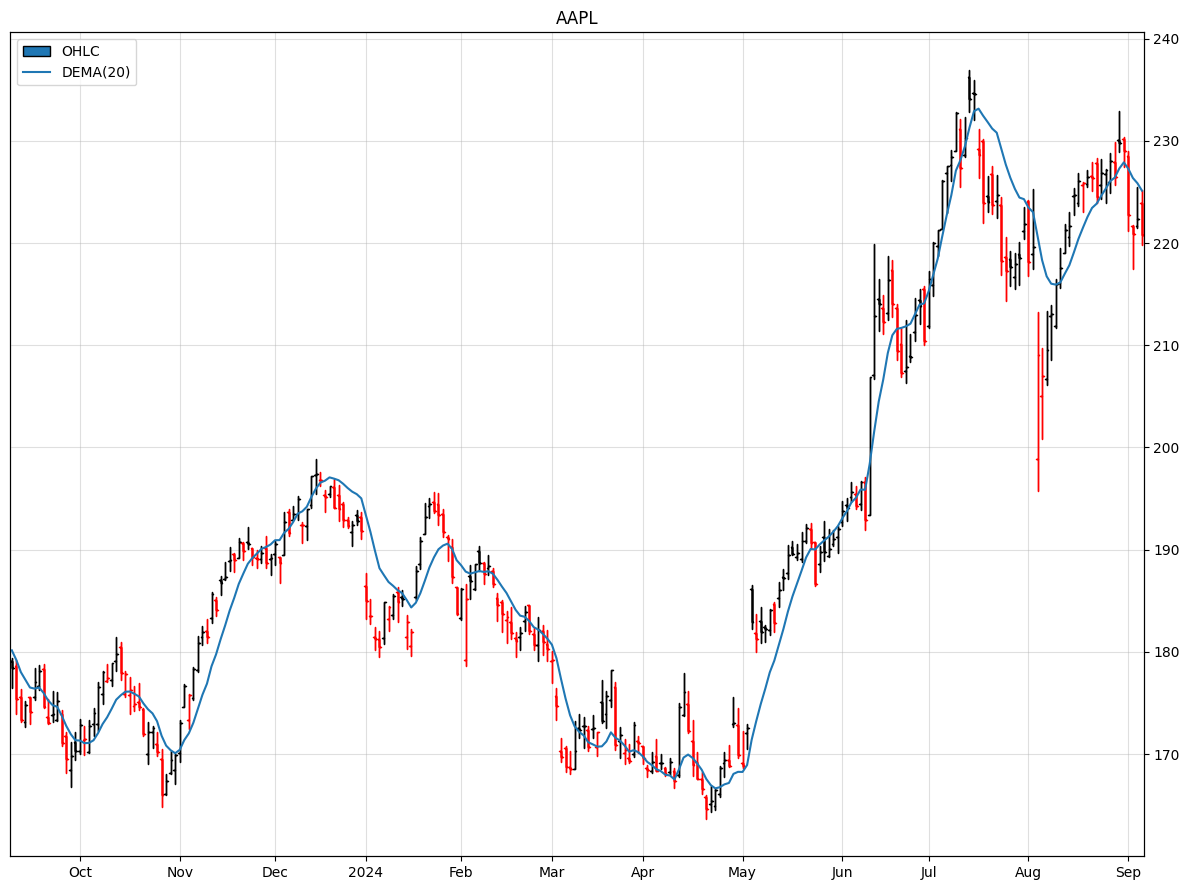

In [24]:
max_bars = 250

indicators = [
    OHLC(),
    DEMA(20),
]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)
